# 데이터 시각화 + 엑셀분석
가능한 캐글 경진대회 상위 10%안에 들기.

In [1]:
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("kaggle_titanic/train.csv", index_col = "PassengerId")

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explore
    seaborn 이 matplolib를 필요한 것만 빼놓은 것.

In [3]:
%matplotlib inline
import seaborn as sns
# seaborn : 간단한걸 쓰고 자세히 들어가는 건 matplotlib 

## countplot

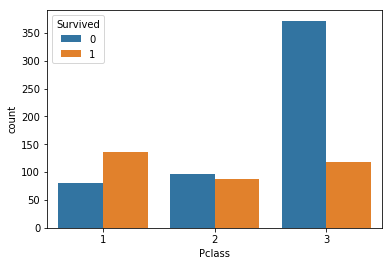

In [4]:
sns.countplot(data = train, x = "Pclass", hue = "Survived")
# count : 승객의 인원 수
# hue : 해당 데이터에 맞게 나눠서 표현해주는 것

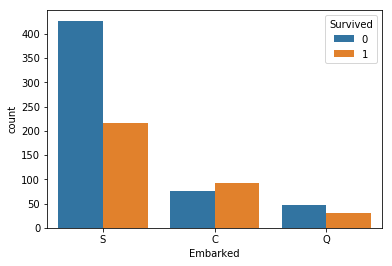

In [5]:
sns.countplot(data = train, x = "Embarked", hue = "Survived")

## BARPLOT

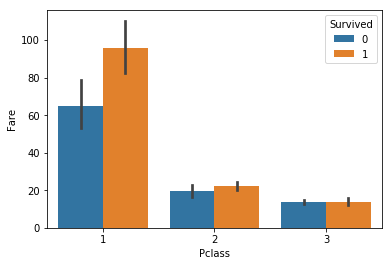

In [6]:
sns.barplot(data = train, x = "Pclass", y = "Fare", hue = "Survived")
# 검은색 라인 = 표준편차 -> 길수록 편차가 큰거. 짧을 수록 적은 것
# barplot과 countplot의 차이는 y가 들어가냐의 차이. y는 숫자 데이터가 들어가야함.

## pointplot

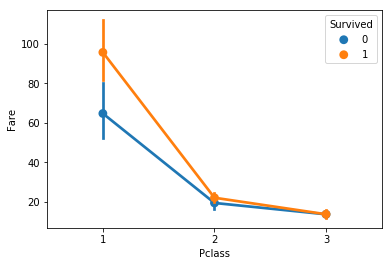

In [7]:
sns.pointplot(data = train, x = "Pclass", y = "Fare", hue = "Survived")
# 서로간에 관계가 있는 x축일 경우 pointplot을 쓰는 게 좋다. => countinuous
# 서로간에 관계가 없는 경우 barplot을 쓰는 게 좋다. => discrete

## distplot

In [8]:
low_fare = train[train["Fare"] < 100]
low_fare

low_fare.shape, train.shape

((838, 11), (891, 11))

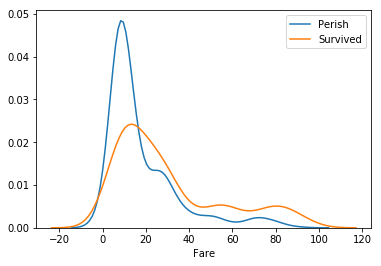

In [9]:
low_fare = train[train["Fare"] < 100]
low_fare

perish = low_fare[low_fare["Survived"] == 0]
survived = low_fare[low_fare["Survived"] == 1]

sns.distplot(perish["Fare"], hist = False, label = "Perish")
sns.distplot(survived["Fare"], hist = False, label = "Survived")

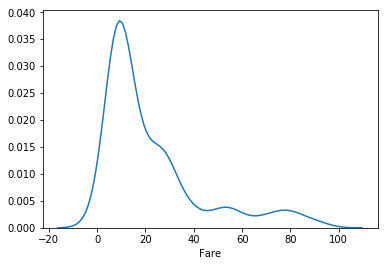

In [10]:
# sns.distplot(train["Fare"], hist=False)
sns.distplot(low_fare["Fare"], hist=False)

# 다른 것들은 데이터를 가져와서 x축에 필요한 데이터를 넣는 것인데, distplot은 필요한 데이터를 가져와 바로 할당해주는 것
# hist="False"를 쓰지 않으면 히스토그램이 뜨는데, 이는 별로 좋지 않다. -> 막대 시작점에 따라 결과가 달라지기 때문에

## LMPLOT

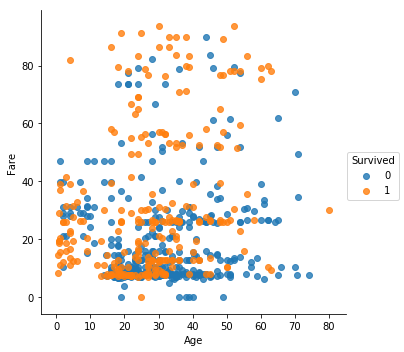

In [11]:
low_fare = train[train["Fare"] < 100]

sns.lmplot(data = low_fare, x = "Age", y = "Fare", 
           hue = "Survived", fit_reg = False)

# 운임요금을 많이 낼수록 많이 사는듯...

## SUBPLOTS
한 화면에 시각화를 여러개 띄우는 것

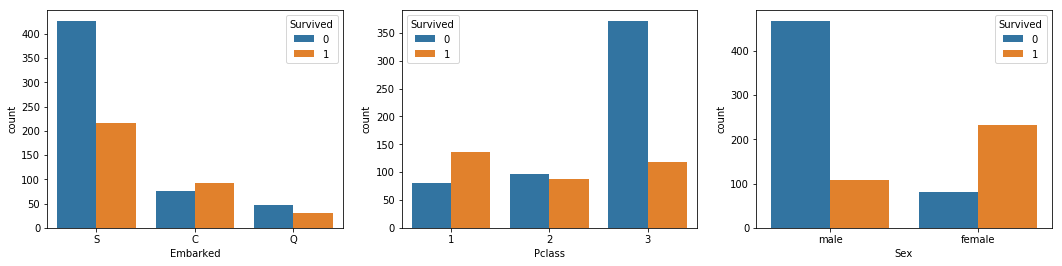

In [12]:
import matplotlib.pyplot as plt

figure, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)
figure.set_size_inches(18, 4)

sns.countplot(data = train, x = "Embarked", hue = "Survived", ax = ax1)
sns.countplot(data = train, x = "Pclass", hue = "Survived", ax = ax2)
sns.countplot(data = train, x = "Sex", hue = "Survived", ax = ax3)

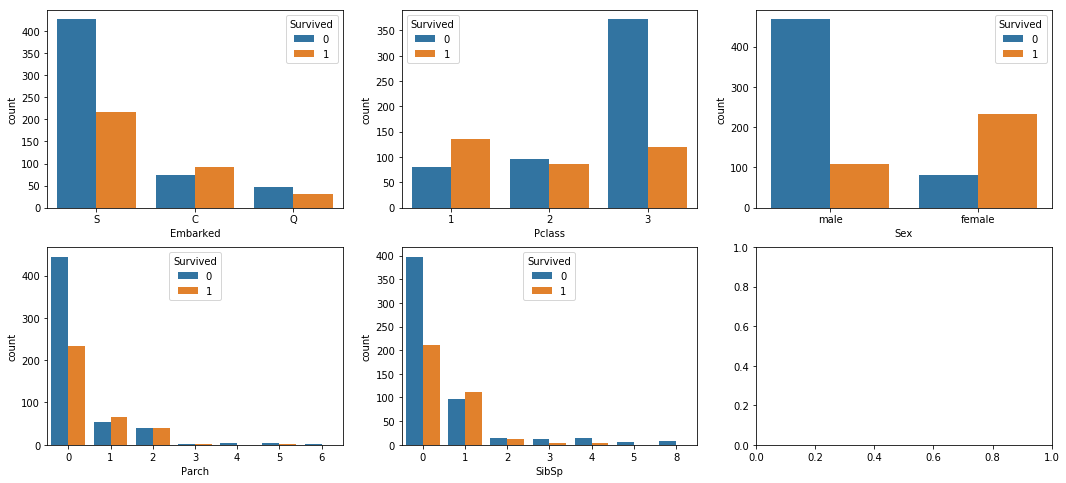

In [13]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18, 8)

sns.countplot(data = train, x = "Embarked", hue = "Survived", ax = ax1)
sns.countplot(data = train, x = "Pclass", hue = "Survived", ax = ax2)
sns.countplot(data = train, x = "Sex", hue = "Survived", ax = ax3)
sns.countplot(data = train, x = "Parch", hue = "Survived", ax = ax4)
sns.countplot(data = train, x = "SibSp", hue = "Survived", ax = ax5)

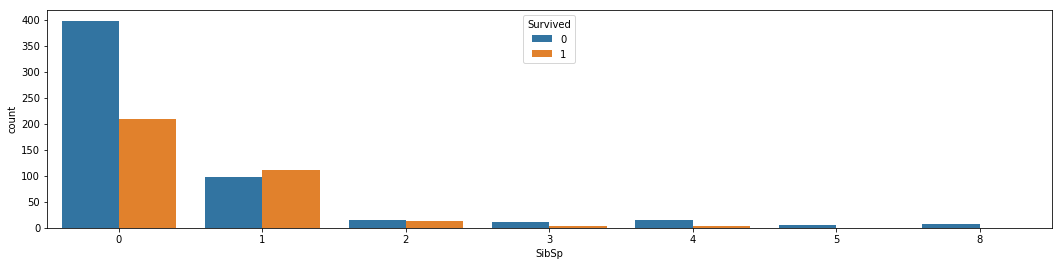

In [14]:
figure, ax1 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(18, 4)

sns.countplot(data = train, x = "SibSp", hue = "Survived", ax = ax1)
# sns.countplot(data = train, x = "SibSp", hue = "Survived")
# 4, 5번줄 둘 다 같은 결과